# Intro 3: Monte Carlo Methods

### Loading Packages
Julia has a variety of third-party open-source packages that will be used to provide additional functionality. The first time they are used in a notebook, the command `using "PackageName"` loads the package. 

If any package has not yet been adding to Julia on your computer, the package manager in Julia should first be used to download it. (If you are already running Julia and JupterLab on your computer, you can start another Julia instance to get a command prompt.) Type `]` at the command prompt to switch to package manager mode and then `add "PackageName"` (note: it can take quite awhile to add and to load some packages). When finished, use the `Backspace` key to return to the Julia command prompt.

To search for packages: https://juliapackages.com/packages

__Packages Used:__ Functions from the following package is used in this notebook for the first time: 

* [Plots](http://docs.juliaplots.org/latest/)

## 1. Logical Expressions
A logical array of 1 (true) and 0 (false) values (of type BitArray) is returned as a result of applying logical operators to arrays; e.g.,

In [69]:
a = [4, 0, -2, 7,0]
a .> 0                   # (Greater than)                 

5-element BitVector:
 1
 0
 0
 1
 0

In [70]:
a .== 7                  # (Equal to)

5-element BitVector:
 0
 0
 0
 1
 0

In [71]:
a .!= 0                  # (Not equal to)

5-element BitVector:
 1
 0
 1
 1
 0

In [72]:
(a .>= 0) .& (a .<= 4)   # (Logical AND)

5-element BitVector:
 1
 1
 0
 0
 1

In [73]:
(a .< 0) .| (a .> 4)     # (Logical OR)

5-element BitVector:
 0
 0
 1
 1
 0

In [74]:
.!((a .< 0) .| (a .> 4)) # (Logical NOR)

5-element BitVector:
 1
 1
 0
 0
 1

To convert a logical array to a single logical value:

In [75]:
a = [4, 0, -2, 7,0]
any(a .> 0)

true

In [76]:
all(a .> 0)

false

A logical array can be used just like an index array to select and change the elements of an array; e.g.,

In [77]:
a = [4, 0, -2, 7, 0]
a[a .> 0]

2-element Vector{Int64}:
 4
 7

In [78]:
a[a .== 7] .= 8
a

5-element Vector{Int64}:
  4
  0
 -2
  8
  0

In [79]:
a[a .!= 0] .+= 1
a

5-element Vector{Int64}:
  5
  0
 -1
  9
  0

## 2. Control Structures
### FOR Loop
FOR loops iterate over all the elements of an array, and logical expressions are used for conditional evaluation in IF statements and WHILE loops.

In [80]:
for i in 1:3
    println(i)
end

1
2
3


In [81]:
for i in 5:-2:1 println(i) end

5
3
1


Greek letters and math symbols can be used (entered as Unicode characters via tab completion):

In [82]:
Π = [2,6,8]      # \Pi<TAB> = [2,6,8]
for α ∈ Π        # for \alpha<TAB> \in<TAB> \Pi<TAB>
    println(α)   # println(\alpha<TAB>)
end              # end

2
6
8


Any type of array can be interated over:

In [83]:
chararray = "abc"                  # String "abc" is array of characters

"abc"

In [84]:
for i in chararray
    println(i)
end

a
b
c


In [85]:
c = [[10, 20, 30], 40, [50, 60]]   # Array of two arrays and a number
for i in c
    println(i)
end

[10, 20, 30]
40
[50, 60]


Most of the standard arithmetic operations and functions cannot be directly applied to all the elements in a multi-level array; instead, *list comprehension* or `map` can used to apply the operation or function to each element of the array:

In [86]:
c += 1    # Error: '+' cannot be directly applied to all elements in multi-level array 'c'

LoadError: MethodError: no method matching +(::Vector{Any}, ::Int64)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
[0m  +([91m::T[39m, ::Integer) where T<:AbstractChar at char.jl:223
[0m  ...

In [87]:
c = [x .+ 1 for x in c]          # (Array comprehension)

3-element Vector{Any}:
   [11, 21, 31]
 41
   [51, 61]

In [88]:
c = map(x -> x .+ 1, c)

3-element Vector{Any}:
   [12, 22, 32]
 42
   [52, 62]

### IF Statement

In [89]:
n = 3
if n > 0
    "Positive value."
elseif n < 0
    "Negative value."
else
    "Zero"
end

"Positive value."

In [90]:
n == 0 ? "Zero" : "Nonzero"      # (Ternary opertor)

"Nonzero"

A logical array can be used to select and change elements of an array. A *conditional array comprehension* can be used to select elements from an array:

In [91]:
a = [4, 0, -2, 7,0]
a[a .> 0] .+= 1
println(a)
a = [x + 1 for x in a if x > 0]  # (Conditional list comprehension)
println(a)

[5, 0, -2, 8, 0]
[6, 9]


### WHILE Loop

In [92]:
while n > 0
    println(n -= 1)
end

2
1
0


### DO-WHILE Loop
The DO-WHILE loop is used to ensure that the statements inside the loop are evaluated at least once even if the logical expression is not true.

In [93]:
done = false
while !done
    println(n += 1)
    if n >= 3 done = true end
end

1
2
3


## 3. Logical vs. Index Arrays
Logical arrays and index arrays provide alternative means of selecting and changing the elements of an array. The `findall` function converts a logical array into an index array:

In [94]:
a = [5, 0, -1, 9, 0]
ispos = a .> 0              # (Logical array)

5-element BitVector:
 1
 0
 0
 1
 0

In [95]:
a[ispos]

2-element Vector{Int64}:
 5
 9

In [96]:
idxpos = findall(a .> 0)    # (Index array)

2-element Vector{Int64}:
 1
 4

In [97]:
a[idxpos]

2-element Vector{Int64}:
 5
 9

Although similar, the use of logical and index arrays have different advantages:

**Advantages of Logical Arrays**

1.	*Direct addressing*: It is easy to determine if individual elements of the target array satisfy the logical expression; e.g., a value of 1 (true) for `ispos(4)` directly determines that `a(4)` is positive, while it would be necessary to search through each element of `idxpos` to determine if 4 is an element of the array (i.e., `any(idxpos == 4)`).

2.	Use of logical vs. set operators: When comparing multiple logical arrays, logical operators like & (AND), | (OR), and ~ (NOT) can be used instead of the more cumbersome set operator functions like `intersect`, `union`, and `setdiff` that are necessary if index arrays are combined.

**Advantages of Index Arrays**

1.	Order information: Unlike logical arrays, the order of the elements in an index array provides useful information; e.g., the index array `idxa` returned by the function `sortperm` indicates the sorted order of the original unsorted array `a`:


In [98]:
a = [5, 0, -1, 9, 0]
sa = sort(a)

5-element Vector{Int64}:
 -1
  0
  0
  5
  9

In [99]:
idxa = sortperm(a)

5-element Vector{Int64}:
 3
 2
 5
 1
 4

2.	Duplicate values: An index array can have multiple elements with the same index value, allowing arrays to be easily manipulated; e.g.,

In [100]:
idx = [1 2 1]
a[idx]

1×3 Matrix{Int64}:
 5  0  5

3.	Space-saving: If only a few elements of the target array are being considered, then an index array need only store these elements, instead of a logical array that is equal in size to the target array; e.g., the index array `idxmina` has only a single element:

In [101]:
mina = minimum(a)

-1

In [102]:
idxmina = argmin(a)

3

## 4. Monte Carlo Methods
The Monte Carlo method is a general-purpose simulation technique that uses random numbers to estimate the solutions to problems that are too difficult to solve analytically or by using other, more specialized, approximation techniques. It differs from _discrete-event simulation_ because it is used for problems where decisions over time are not involved.

### Ex 1: Estimating $\pi$
In this example (adapted from A. Csete), the value of $\pi$ will be estimated by determining the number *m* out of *n* points that fall within a unit circle ($r = 1$). The probability that a point $(x, y)$ randomly generated inside a square is also inside the circle is equal to the ratio of area of the circle $A_{\rm{circle}}$ and the square $A_{\rm{square}}$:

$\quad P(x^2 + y^2 < 1) = \dfrac{A_{\rm{circle}}}{A_{\rm{square}}} = \dfrac{\pi r^2}{4} = \dfrac{\pi}{4} \approx \dfrac{m}{n} $

Pi can then be estimated as $ \pi = \dfrac{4m}{n} $.

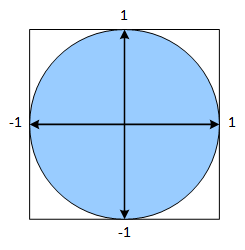

The Monte Carlo method can be implemented as follows, starting with a small number of points ($n = 3$) while the code is being developed and then switching to a larger number to actually estimate pi (to get the same random numbers as shown below, the state of the random number generator can first be set to some arbitrary seed number like 1256):

In [103]:
using Random
n = 3
Random.seed!(1256)      # Set seed to allow replication
XY = rand(n,2)          # Generate n x 2 uniform values (0,1)

3×2 Matrix{Float64}:
 0.909624  0.114798
 0.462602  0.600782
 0.464616  0.505547

In [104]:
XY = 2XY .- 1

3×2 Matrix{Float64}:
  0.819247   -0.770405
 -0.0747958   0.201563
 -0.0707688   0.0110946

In [105]:
isin = sum(XY .^ 2, dims=2) .< 1

3×1 BitMatrix:
 0
 1
 1

In [106]:
m = sum(isin)

2

Compare estimate to actual (where variable "pi" entered as Unicode character via tab completion):

In [107]:
πest = 4m/n    # (where \pi<TAB>est ⟹ πest)

2.6666666666666665

In [108]:
π              # Predefined constant (where \pi<TAB> ⟹ π)

π = 3.1415926535897...

Now that it is working, *n* can be increased and the results plotted:

In [109]:
n = 5000
XY = rand(n,2) * 2 .- 1
isin = sum(XY .^ 2, dims=2) .< 1
@show m = sum(isin)
@show πest = 4m/n
π

m = sum(isin) = 3920
πest = (4m) / n = 3.136


π = 3.1415926535897...

To plot results:

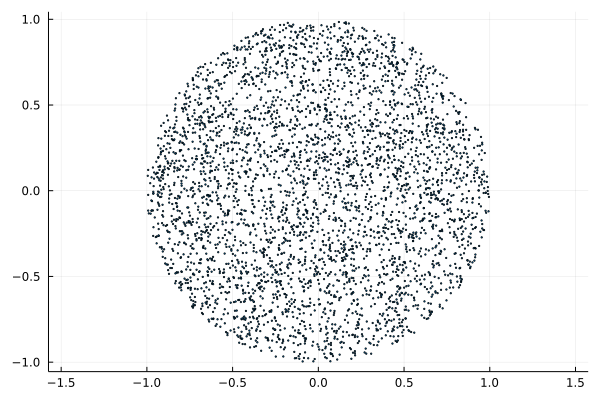

In [110]:
using Plots
scatter(XY[isin[:],1], XY[isin[:],2], markersize=1, aspect_ratio=:equal, legend=false)

### Ex 2: Galileo on Dice
Sometime before 1642, Galileo was asked to analyze the probability of the sum of three dice being 9 or else 10.<!-- R.W. Hamming, Art of Prob., p60--> Thought at the time was that these probabilities should be the same, but gamblers invariably preferred to bet on 10 versus 9, giving empirical evidence that these probabilities are not the same and, in fact, the probability of 10 is greater then 9.

>It had previously been argued that since
>
>10 = 6 + 3 + 1 = 6 + 2 + 2 = 5 + 4 + 1 = 5 + 3 + 2 = 4 + 4 + 2 = 4 + 3 + 3
>
>and
>
>9 = 6 + 2 + 1 = 5 + 3 + 1 = 5 + 2 + 2 = 4 + 4 + 1 = 4 + 3 + 2 = 3 + 3 + 3
>
>and therefore there are six ways to get a sum of 9 and six ways to get a sum of 10, then both should be equally likely. <!-- [https://gottwurfelt.com/2012/03/07/how-long-does-it-take-to-observe-that-10-is-more-common-than-9-with-three-dice/] -->

The following is a table from Galileo's _Concerning an Investigation on Dice_ [https://www.york.ac.uk/depts/maths/histstat/galileo.pdf]  that nicely summarizes his approach to solving the problem:

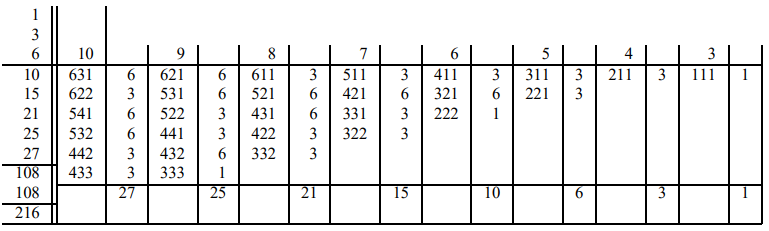

The range of possible sums of three dice are from 3 to 18, and the table shows the sums of 10 down to 3. What Galileo added to the analysis was to realize that each of the different ways to get a sum can occur in multiple outcome sequences. The range of possible sums of three dice are from 3 to 18, and the table shows the sums of 10 down to 3. What Galileo added to the analysis was to realize that each of the different ways to get a sum can occur in multiple outcome sequences. The sum 6 + 2 + 1 = 9 can occur in six different ways:

```
using Combinatorics
unique(collect(permutations([6,2,1])), dims = 1)
6-element Array{Array{Int64,1},1}:
 [6, 2, 1]
 [6, 1, 2]
 [2, 6, 1]
 [2, 1, 6]
 [1, 6, 2]
 [1, 2, 6]

```

The sum 5 + 2 + 2 = 9 in three different ways:

```
unique(collect(permutations([5,2,2])), dims = 1)
3-element Array{Array{Int64,1},1}:
 [5, 2, 2]
 [2, 5, 2]
 [2, 2, 5]
 
 ```
 
 While the sum 3 + 3 + 3 = 9 can only occur in one way:

```
unique(collect(permutations([3,3,3])), dims = 1)
1-element Array{Array{Int64,1},1}:
 [3, 3, 3]

```

The resulting total outcomes for 10 and 9 are 27 and 25, respectively, providing evidence of the higher probability of 10 versus 9. Since there are $6^3 = 216$ total outcomes, the probabilities for 10 and 9 are $\frac{27}{216}$ and $\frac{25}{216}$, respectively.

#### First Approach: Direct Calculation
Since there are only $6^3 = 216$ total outcomes, it is easy to directly calculate the total number of ways of getting sums of 10 and 9 using three nested FOR loops:

In [111]:
sumexact10, sumexact9 = 0,0
for i in 1:6
    for j in 1:6
        for k in 1:6
            sumcnt = i+j+k
            if sumcnt == 10
                sumexact10 += 1
            elseif sumcnt == 9
                sumexact9 += 1
            end
        end
    end
end
sumexact10, sumexact9

(27, 25)

The (exact) probabilities of getting 10 or 9 are then

In [112]:
sumexact10/6^3, sumexact9/6^3

(0.125, 0.11574074074074074)

#### Second Approach: The Monte Carlo Method
Although direct calculation is feasible for three dice, if the number of dice increased to tens, hundreds, or thousands, direct calculation is not feasible, in general, and the Monte Carlo method provides a feasible means to estimate the values. In the following example, first, only five samples of three dice outcomes will be randomly generated. This small example is a good way to check to make sure the code is working correctly. Once verified, the number of samples can be increased in order to get a statistically better estimate.

In [113]:
using Random
n = 3    # Number of dice
Random.seed!(1234)              # Set seed to allow replication
u = rand(n)                     # Generate uniform values (0,1)

3-element Vector{Float64}:
 0.5908446386657102
 0.7667970365022592
 0.5662374165061859

In [114]:
6u                              # Mutiply by 6 to get values (0,6)

3-element Vector{Float64}:
 3.5450678319942615
 4.6007822190135546
 3.397424499037115

(_Note:_ In the following use of the ceiling function, `ceil.(` is used instead of `ceil(` because an array is input.)

In [115]:
x = ceil.(6u)                    # Round up to get values 1 to 6

3-element Vector{Float64}:
 4.0
 5.0
 4.0

Since will be looking for integer counts, using `Float64` could result in roundoff error when the cummulative counts are compared to an integer value; instead, convert counts to integers: 

In [116]:
x = Int.(ceil.(6u))              # Round up to get integers values 1 to 6

3-element Vector{Int64}:
 4
 5
 4

In [117]:
sum(x) == 10                     # Check if sum equals 10

false

Once it is been verified that the procedure is working, multiple samples can be generated and the number of times a sum appears counted:

In [118]:
n = 3              # Number of dice
m = 5000           # Number of samples
sum10,sum9 = 0,0   # Note: can do multiple assignments on one line
for i in 1:m
    sumcnt = sum(Int.(ceil.(6*rand(n))))
    if sumcnt == 10
        sum10 += 1
    elseif sumcnt == 9
        sum9 += 1
    end
end
sum10/m, sum9/m                 # Estimated probabilities

(0.1254, 0.1194)

In [119]:
sumexact10/6^n, sumexact9/6^n   # Exact probabilities

(0.125, 0.11574074074074074)

Each time the cell is executed, a different estimate is provided:

In [120]:
sum10,sum9 = 0,0
for i in 1:m
    sumcnt = sum(Int.(ceil.(6*rand(n))))
    if sumcnt == 10
        sum10 += 1
    elseif sumcnt == 9
        sum9 += 1
    end
end
sum10/m, sum9/m                 # Estimated probabilities

(0.1218, 0.1188)

When there are a larger number of dice, any direct calculation is not feasible, in general, although it possible to determine the exact probabilities for some special cases. With respect to dice, a sum equal to the number of dice, $n$, corresponds to the outcome all of the dice having a value of one, making it possible to determine the exact probability of this outcome, namely, $P(n) = \frac{1}{6^n}$

This can be a very small number, so it is important to look at enough samples in order to adequately estimate this probability. Given $P(n)$, this outcome should occur on average once every $\frac{1}{P(n)}$ samples. The actual number of samples used should be some multiple of this number in order to find this outcome more than just half the time, which is what would happen if only $\frac{1}{P(n)}$ samples were used. For 10 dice, to sample five times $\frac{1}{P(n)}$, over 300 million samples were used to estimate the probability of 10 ones (note: it can take a long time to run, 10+ minutes):

```
n = 10                      # Number of dice
m = Int(round(5/(1/6^n)))   # Number of samples
sumx = 0
for i in 1:m
    sumcnt = sum(Int.(ceil.(6*rand(n))))
    if sumcnt == n
        sumx += 1
    end
end
m, sumx/m, 1/6^n

(302330880, 1.65381716879202e-8, 1.65381716879202e-8)

```

Using a lesser number for _m_ results in finding no samples equal to _n_:

In [121]:
n = 10         # Number of dice
m = Int(1e5)   # Number of samples
sumx = 0
for i in 1:m
    sumcnt = sum(Int.(ceil.(6*rand(n))))
    if sumcnt == n
        sumx += 1
    end
end
m, sumx/m, 1/6^n

(100000, 0.0, 1.65381716879202e-8)

In general, estimating probabilities for numbers that have multiple possible outcomes makes it much more likely that a small number of samples can still provide a reasonable estimate, but, when there are multiple outcomes, there are usually no easy-to-determine analytical means of estimating the exact probability, which is why the Monte Carlo method is being used. For example, the following estimates that propability that a roll of ten dice will sum to 30 or 40:

In [122]:
n = 10         # Number of dice
m = Int(1e5)   # Number of samples
sumx = 0
for i in 1:m
    sumcnt = sum(Int.(ceil.(6*rand(n))))
    if (sumcnt == 3n) | (sumcnt == 4n)    # Logical OR
        sumx += 1
    end
end
m, sumx/m

(100000, 0.09632)

### Ex 3: Machine Utilization
A machine has just been purchased that will be used for the final finishing operation for three different products. The unique geometry of each product requires that a specialized fixture be used inside the machine for each different product. Currently, the machine is configured with two fixtures for product 1, two fixtures for product 2, and one fixture for product 3. Since the products are all made to order, estimate the probability that the first five orders will fully utilize all of the fixtures in the machine (i.e., there will be two orders for product 1, two for product 2, and one for product 3). Historically, approximately half of all orders are for product 1, 30% for product 2, and 20% for product 3.

In [123]:
using Random
Random.seed!(2342)
p = [.5, .3, .2]     # Product demand probabilities
m = 100000           # Number of samples
n = 5                # Number of orders

5

In [124]:
tottarget = 0
for i in 1:m
    tot1,tot2,tot3 = 0,0,0
    for j in 1:n
        x = rand(1)[]            # Scalar random value
        if x < p[1]              # Product 1
            tot1 += 1
        elseif x < sum(p[1:2])   # Product 2
            tot2 += 1
        else                     # Product 3
            tot3 += 1
        end
    end
    if (tot1 == 2) & (tot2 == 2) & (tot3 == 1)
        tottarget += 1
    end
end
tottarget/m

0.1353

Low probability (13.53%) of full (100%) machine utilization for first five orders suggests that it might be a good idea to consider using other fixture assignments. The code above can be used to evaluate alternate assignments (how?). 

As written, the code is not very flexible; in particular, it would have to be extended if there were additional products. Instead, can use the cumulative sum of `p` to determine which product `x` corresponds to:

In [125]:
p = [.5, .3, .2]
LB = pushfirst!(cumsum(p[1:end-1]),0)
UB = cumsum(p)
[LB UB]

3×2 Matrix{Float64}:
 0.0  0.5
 0.5  0.8
 0.8  1.0

Use a test value `x = 0.6` to see if product 2 can be determined:

In [126]:
x = 0.6
isLB = x .>= LB
isUB = x .< UB
[isLB isUB (isLB .& isUB)]

3×3 BitMatrix:
 1  0  0
 1  1  1
 0  1  0

In [127]:
idx = findall(isLB .& isUB)[]

2

In above, using `x .>= LB` and `x .< UB` since `rand` generates values in the range $[0, 1)$.

Also, an array `k` can be used to represent the count targets and `all` to test if the counts in `tot` are equal to the target. This then creates a more flexible procedure that can handle any number of products:

In [128]:
using Random
Random.seed!(2342)
p = [.5, .3, .2]      # Product demand probabilities
m = 100000            # Number of samples
n = 5                 # Number of orders
k = [2, 2, 1]         # Count targets

3-element Vector{Int64}:
 2
 2
 1

In [129]:
tottarget = 0
for i in 1:m
    tot = Int.(zeros(length(p)))
    for j in 1:n
        x = rand(1)[]   # Scalar random value
        idx = findall((x .>= pushfirst!(cumsum(p[1:end-1]),0)) .& 
            (x .< cumsum(p)))[]
        tot[idx] += 1
    end
    if all(tot .== k)
        tottarget += 1
    end
end
tottarget/m

0.1353

Although not generally true, for this particular example we can estimate the requested probability exactly using multinomial random variables:

$\quad \dfrac{n!}{k_{1}!k_{2}!k_{3}!}p^{k_1}_{1}p^{k_2}_{2}p^{k_3}_{3} = 
\dfrac{5!}{2!2!1!}0.5^{2}0.3^{2}0.2^{1}$

where $\sum k_i = n$ and $\sum p_i = 1$.

In [130]:
(factorial(5)/(factorial(2)*factorial(2)*factorial(1)))*((.5^2)*(.3^2)*(.2^1))

0.13499999999999998

## 5. Discrete-Event Simulation
Discrete-event simulation can be used to analyze situations involving complex interactions that occur over time that are usually impossible to analyze using any type of analytical procedures. Dedicated packages and languages are available to make it easier to coordinate the interactions between different events in a simulation. The following examples are simple enough that, in the first case, there is an analytical estimate available (and is a good way to validate the basic procedure used so that it could be applied to situations where there are no analytical estimates available), and in the second, only a single type of event occurs, which makes it possible to model it using simple logical tests.

### Ex 4: Random Walk Simulation
The following example simulates a random walk. Starting from the origin at 0, there is a 50–50 chance that the next step is up one unit of distance (+1) or down one unit of distance (–1). The vector __d__ represents the cumulative distance from the origin at each step:

Start by using only 5 steps (and, to get the same random numbers as show below, the state of the random number generator can first be set to some arbitrary number like 123).

In [131]:
using Random
Random.seed!(123)
s = rand(5)

5-element Vector{Float64}:
 0.7684476751965699
 0.940515000715187
 0.6739586945680673
 0.3954531123351086
 0.3132439558075186

In [132]:
s .> 0.5

5-element BitVector:
 1
 1
 1
 0
 0

In [133]:
(s .> 0.5)*2 .- 1

5-element Vector{Int64}:
  1
  1
  1
 -1
 -1

In [134]:
d = cumsum((s .> 0.5)*2 .- 1)

5-element Vector{Int64}:
 1
 2
 3
 2
 1

Now increase to 100 steps and plot the result:

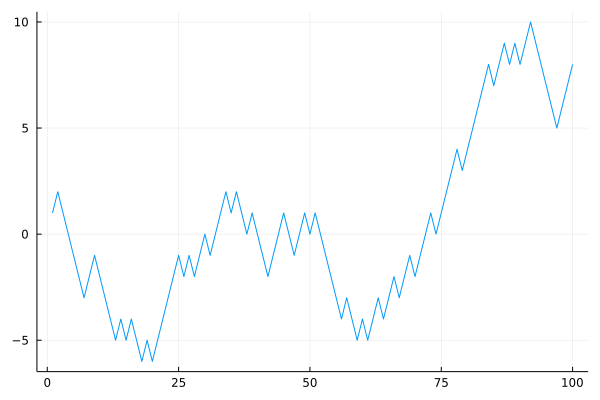

In [135]:
using Plots
s = rand(100)
d = cumsum((s .> 0.5)*2 .- 1)
plot(d, legend = false)

Multiple runs of the simulation can be used to verify the theoretical estimate of the expected distance from the origin after $t$ steps, where $d(t)$ is the last element of **d**:

$ \quad {\bf{E}}\big[{\left| d(t) \right|}\big] \to \sqrt{\dfrac{2t}{\pi }} $
	 
A FOR-loop can be used iterate through 1,000 runs of a 1,000 step random walk:

In [136]:
n = 1000; dt = 0 
for i in 1:n        # pop! used to get the last value from array
    dt += abs(pop!(cumsum((rand(1000) .> 0.5)*2 .- 1)))
end
dt/n

24.974

This compares with the theoretical estimate: $ \sqrt{\dfrac{2(1,000)}{\pi}} = 25.2313 $